In [1]:
import pandas, seaborn, scipy, numpy, matplotlib, collections, sklearn, math

%matplotlib inline
from matplotlib import pyplot
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


# Constants
library_sizes = {
    'WGS': 3002000000,
    'WES': 50160183,
}
mhc_binding_threshold_affinity = 500



%matplotlib inline
%config InlineBackend.figure_format = 'png'

matplotlib.rc("savefig", dpi=800)
#matplotlib.rc("savefig", dpi=72)
#matplotlib.rc('text', usetex=False)
#reload(c)

pandas.set_option('display.max_rows', 500)
pandas.set_option('display.max_columns', 500)

def print_full(x):
    pandas.set_option('display.max_rows', len(x))
    print(x)
    pandas.reset_option('display.max_rows')
    
def bootstrap(values, statistic=numpy.mean, samples=5000):
    values = pandas.Series(values).dropna()
    if len(values) <= 1:
        return (numpy.nan, numpy.nan)
    values = [statistic(sklearn.utils.resample(values)) for i in range(samples)]
    return (numpy.percentile(values, 5), numpy.percentile(values, 95))

def round_to_n(x, n):
    return round(x, -int(math.floor(math.log10(x))) + (n - 1)) 

def mean_with_errorbars(values, decimals=0):
    pattern = "%%0.%df" % decimals
    bars = bootstrap(values)
    if numpy.nan in bars:
        return pattern % numpy.mean(values)
    if decimals == 0:
        bars = (round_to_n(bars[0], 2), round_to_n(bars[1], 2)) 
    return (pattern + " (" + pattern + " - " + pattern + ")") % ((numpy.mean(values),) + bars)


/Users/tim/venvs/analysis-venv-2.7/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/tim/venvs/analysis-venv-2.7/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
sources = pandas.read_csv("../data/sources.csv", index_col="source_id")
sources = sources.ix[sources.cohort == "AOCS"]

In [3]:
df = pandas.read_csv("../data/deconstructsigs_output.csv", index_col=0)
df.columns = [x.replace(".", " ") for x in df.columns]
df["kind"] = [x.split()[-1] for x in df.Sample]
df["source_id"] = [x.split()[0] for x in df.Sample]
del df["Sample"]
df = df.set_index(["source_id", "kind"], drop=False)
df = df.loc[:,(df != 0).any(axis=0)]
signatures = sorted([x for x in df.columns if x not in ('kind', 'source_id')], key=lambda x: x[0])
df["treated"] = [sources.ix[s].treated if s in sources.index else False for s in df.source_id]
df.to_csv("../data/deconstructsigs_output.cleaned.csv")
df

,,Signature 1,Signature 2,Signature 3,Signature 4,Signature 5,Signature 6,Signature 8,Signature 9,Signature 10,Signature 12,Signature 13,Signature 14,Signature 16,Signature 18,Signature 19,Signature 22,Signature 23,Signature 25,Signature 26,Signature 29,Cisplatin Gallus gallus,Cyclophosphamide Gallus gallus,Etoposide Gallus gallus,Cisplatin C Elegans fcd 2,Cisplatin C Elegans polq 1,Cisplatin C Elegans xpf 1,kind,source_id,treated
source_id,kind,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AOCS-166-1/SP102133,all,0.000000,0.000000,0.000000,0.000000,0.000000,0.063701,0.000000,0.250905,0.000000,0.514761,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.094825,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,all,AOCS-166-1/SP102133,False
AOCS-092-13/SP101630,new,0.000000,0.000000,0.133002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.094217,0.120342,0.141969,0.000000,0.000000,0.000000,0.080833,0.152453,0.000000,0.000000,0.000000,0.145093,new,AOCS-092-13/SP101630,True
AOCS-119-13/SP101732,all,0.000000,0.000000,0.217817,0.000000,0.000000,0.000000,0.473673,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.071525,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,all,AOCS-119-13/SP101732,True
AOCS-117-13/SP101724,all,0.000000,0.000000,0.243353,0.000000,0.000000,0.000000,0.310672,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.067353,0.000000,0.000000,0.000000,0.000000,all,AOCS-117-13/SP101724,True
AOCS-135-13/SP101855,all,0.000000,0.000000,0.272220,0.000000,0.103954,0.000000,0.397365,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,all,AOCS-135-13/SP101855,True
AOCS-135-14/SP101860,all,0.000000,0.000000,0.276793,0.000000,0.110276,0.000000,0.386780,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,all,AOCS-135-14/SP101860,True
AOCS-150-13/SP102010,all,0.000000,0.000000,0.293942,0.000000,0.000000,0.000000,0.239073,0.000000,0.000000,0.000000,0.000000,0.000000,0.078714,0.00000,0.069938,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.074023,0.000000,0.000000,all,AOCS-150-13/SP102010,True
AOCS-004-1/SP101519,all,0.000000,0.000000,0.325053,0.000000,0.176914,0.000000,0.134828,0.000000,0.000000,0.000000,0.000000,0.000000,0.088918,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,all,AOCS-004-1/SP101519,False
AOCS-088-1/SP101610,all,0.000000,0.000000,0.331926,0.000000,0.000000,0.000000,0.437654,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,all,AOCS-088-1/SP101610,False


In [4]:
def make_draw_df(draw_df):
    signature_descriptions = {
        1: 'Age',
        3: 'BRCA',
        4: 'Smoking',
        6: 'MMR',
        9: 'AID',
        10: 'POLE',
        13: 'AID',
        #22: 'Arist.',
        26: 'MMR',
        29: 'Tobacco',
    }
    column_renames = {
        'Chicken cisplatin': "Cisplatin",
        'Chicken cyclophosphamide': 'Cyc.',
        'Chicken etoposide': 'Etoposide',
    }
    column_renames.update(
        dict(("Signature %d" % num, ("(%d) %s" % (num, signature_descriptions.get(num, ''))).strip())
                  for num in range(30)))
    if 'treated' in draw_df.columns:
        draw_df["treated"] = (draw_df.treated == True).astype(float)
        draw_df["unique"] = (draw_df.kind == "new").astype(float)
        draw_df["control"] = (draw_df.kind == "check").astype(float)
        draw_df = draw_df[["treated", "unique", "control"] + signatures]
    else:
        draw_df = draw_df[signatures]

    draw_df.index = [x[0] for x in draw_df.index]
    draw_df = draw_df.ix[sorted(draw_df.index)]
    draw_df.columns = [column_renames.get(x, x) for x in draw_df.columns]
    return draw_df

In [5]:
treatments_df = pandas.read_csv("../data/treatments.csv").dropna()
donor_to_treatments = collections.defaultdict(set)
for (i, row) in treatments_df.iterrows():
    donor_to_treatments[row.submitted_donor_id].add(row["DRUG NAME"])
counts = treatments_df["DRUG NAME"].value_counts()
donor_to_treatments = dict(
    (key, sorted(value, key=counts.get, reverse=True))
     for (key, value) in donor_to_treatments.items())
donor_to_treatments

donors = sorted(sources.donor)
counts = treatments_df["DRUG NAME"].value_counts()
treatment_matrix_df = pandas.DataFrame(
    collections.OrderedDict(
        (drug, [
                row.treated and drug in donor_to_treatments.get(row.donor, []) for (_, row) in sources.iterrows()
        ]) for drug in counts.index),
    index=sources.index)
treatment_matrix_df

,carboplatin,paclitaxel,liposomal doxorubicin,gemcitabine,cyclophosphamide,topotecan,cisplatin,olaparib,docetaxel,bevacizumab,farletuzumab/placebo,nab-paclitaxel,etoposide
source_id,,,,,,,,,,,,,
AOCS-001-1/SP101515,False,False,False,False,False,False,False,False,False,False,False,False,False
AOCS-002-1/SP101517,False,False,False,False,False,False,False,False,False,False,False,False,False
AOCS-004-1/SP101519,False,False,False,False,False,False,False,False,False,False,False,False,False
AOCS-005-1/SP101521,False,False,False,False,False,False,False,False,False,False,False,False,False
AOCS-034-13/SP101524,True,True,True,True,False,True,False,False,False,False,False,False,False
AOCS-034-1/SP101523,False,False,False,False,False,False,False,False,False,False,False,False,False
AOCS-055-1/SP101526,False,False,False,False,False,False,False,False,False,False,False,False,False
AOCS-056-1/SP101528,False,False,False,False,False,False,False,False,False,False,False,False,False
AOCS-057-1/SP101530,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
sources.ix[sources.donor == "AOCS-170"]

,donor,cohort,library,treated,timepoint,metastasis,tissue_type,interval_days,assay,paired
source_id,,,,,,,,,,
AOCS-170-12/SP102177,AOCS-170,AOCS,WGS,False,primary,False,ascites,0,WGS,True
AOCS-170-1/SP102174,AOCS-170,AOCS,WGS,True,primary,False,solid,61,WGS,True


[<matplotlib.gridspec.SubplotSpec object at 0x1107b6a90>, <matplotlib.gridspec.SubplotSpec object at 0x1107b6ad0>, <matplotlib.gridspec.SubplotSpec object at 0x1107b6b10>, <matplotlib.gridspec.SubplotSpec object at 0x1107b6b50>, <matplotlib.gridspec.SubplotSpec object at 0x1107b6b90>, <matplotlib.gridspec.SubplotSpec object at 0x1107b6bd0>]


/Users/tim/venvs/analysis-venv-2.7/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


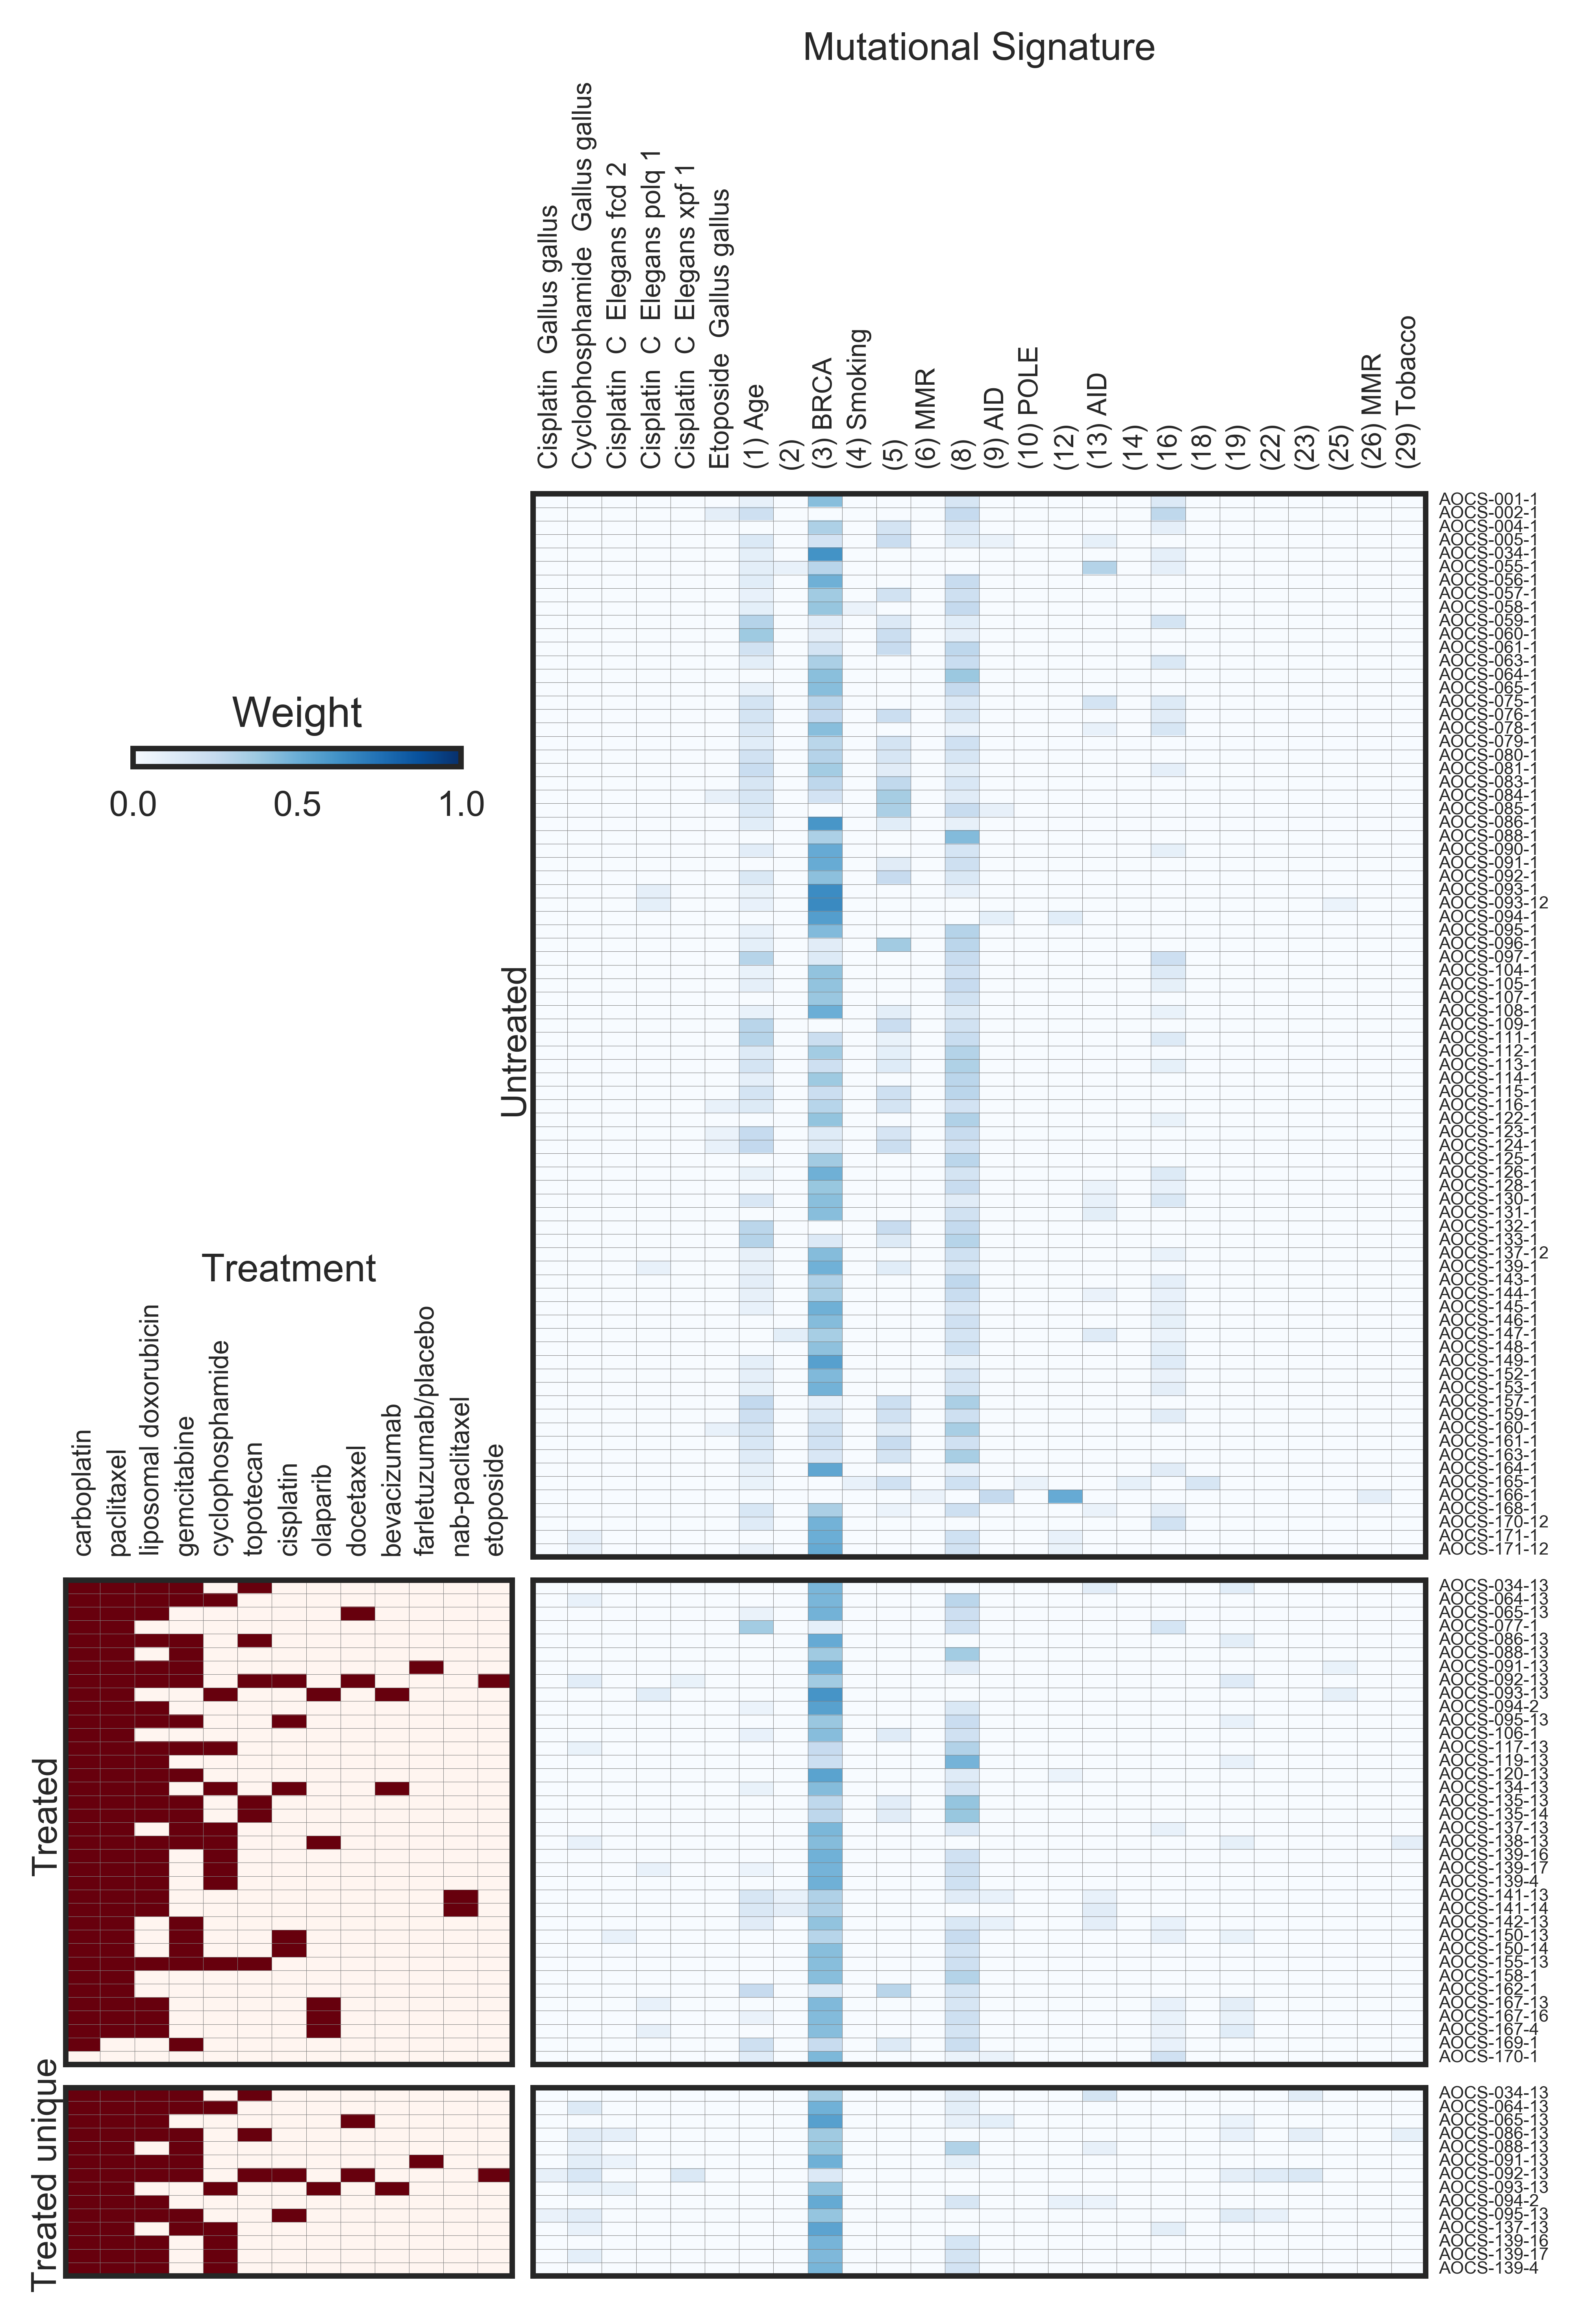

In [7]:
seaborn.set_context('paper')
seaborn.set_style('white')

chunks = [
#    ("Control", df.ix[(df.kind == "check")]),
    ("Pre-treatment", df.ix[(df.kind == "all") & (~df.treated)]),
    ("Post-treatment", (df.ix[(df.kind == "all") & (df.treated)])),
    ("Unique\nto treated", (df.ix[(df.kind == "new")])),
]


fig = pyplot.figure(figsize=(5,7.5))
gs = list(matplotlib.gridspec.GridSpec(
        len(chunks),
        2,
        width_ratios=[len(treatment_matrix_df.columns), len(signatures)],
        height_ratios=[len(x[1]) for x in chunks] + [2]))
print(gs)
gs_pairs = []
while gs:
    gs_pairs.append((gs.pop(0), gs.pop(0)))

prev_axs = []
for (i, ((label, chunk), (left_spec, right_spec))) in enumerate(zip(chunks, gs_pairs)):
    draw_chunk = make_draw_df(chunk[signatures])
    sub_treatment_matrix_df = treatment_matrix_df.ix[draw_chunk.index]
    axs = []
    
    # Left
    if i != 0:
        ax = pyplot.subplot(left_spec, sharex=prev_axs[-1][0] if i > 1 else None)
        heatmap = ax.imshow(
            sub_treatment_matrix_df.values.astype(float),
            cmap=pyplot.cm.Reds,
            origin='upper',
            interpolation='nearest',
            aspect='auto',
            vmin=0,
            vmax=1)
        
        if i == 1:
            ax.xaxis.tick_top()
            ax.xaxis.set_label_position('top') 
            ax.set_xticks(numpy.arange(sub_treatment_matrix_df.shape[1])+0.0, minor=False)
            ax.set_xticklabels(sub_treatment_matrix_df.columns, minor=False, rotation=90, fontsize=6)
            pyplot.xlabel("Treatment")
        else:
            ax.axes.get_xaxis().set_visible(False)
            
        ax.axes.get_yaxis().set_visible(False)
        
        for v in range(sub_treatment_matrix_df.shape[1]):
            ax.axvline(v + .5, color='gray', lw=.10)
        
    else:
        ax = None
    axs.append(ax)
    
    # Right
    ax = pyplot.subplot(right_spec, sharex=prev_axs[-1][1] if prev_axs else None, sharey=ax)
    axs.append(ax)

    heatmap = ax.imshow(
        draw_chunk.values,
        cmap=pyplot.cm.Blues,
        interpolation='nearest',
        aspect='auto',
        origin='upper',
        vmin=0,
        vmax=1)

    if i == 0:
        ax.xaxis.tick_top()
        ax.xaxis.set_label_position('top') 

        ax.set_xticks(numpy.arange(draw_chunk.shape[1])+0.0, minor=False)
        ax.set_xticklabels(draw_chunk.columns, minor=False, rotation=90, fontsize=6)
        pyplot.xlabel("Mutational Signature")
    else:
        ax.axes.get_xaxis().set_visible(False)
        
    for v in range(draw_chunk.shape[1]):
        ax.axvline(v + .5, color='gray', lw=.10)
    
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position('right') 
    ax.set_yticks(numpy.arange(draw_chunk.shape[0])+0.0, minor=False)
    ax.set_yticklabels([x.split("/")[0] for x in draw_chunk.index], minor=False, fontsize=4, ha='left')
    yax = ax.get_yaxis()
    yax.set_tick_params(pad=3.0)
    

    # Common:
    for ax in axs:
        if ax is not None:
            for v in range(draw_chunk.shape[0]):
                ax.axhline(v + .5, color='gray', lw=.10)
    
    prev_axs.append(axs)

# See http://stackoverflow.com/questions/18856069/how-to-shrink-a-subplot-colorbar
base_ax = prev_axs[-1][0]
cax = inset_axes(base_ax,
                 width="70%",
                 height="10%",
                 bbox_transform=base_ax.transAxes,
                 bbox_to_anchor=(-0.125, 7.25, 1.05, 0.95),
                 loc=1)

cbar = fig.colorbar(heatmap, cax=cax, orientation='horizontal', ticks=[0,0.5,1.0])
cbar.ax.set_title("Weight")

prev_axs[0][1].text(-1.5, 40, "Untreated", fontsize="small", rotation=90, va="center")
prev_axs[1][0].text(-1.5, 17, "Treated", fontsize="small", rotation=90, va="center")
prev_axs[2][0].text(-1.5, 6, "Treated unique", fontsize="small", rotation=90, va="center")


pyplot.tight_layout(h_pad=-7.2, w_pad=0.5)
#pyplot.savefig("../figures/signatures.pdf")


In [10]:
df.ix[~df.treated][signatures].mean(0).sort(inplace=False)

Cisplatin  Gallus gallus           0.000000
Signature 23                       0.000000
Signature 22                       0.000000
Signature 19                       0.000000
Signature 29                       0.000000
Cisplatin  C  Elegans fcd 2        0.000000
Cisplatin  C  Elegans xpf 1        0.000000
Signature 25                       0.000776
Signature 6                        0.000806
Signature 10                       0.000826
Signature 14                       0.001043
Signature 26                       0.001200
Signature 4                        0.001748
Cyclophosphamide  Gallus gallus    0.001910
Signature 18                       0.002067
Signature 2                        0.002162
Cisplatin  C  Elegans polq 1       0.003183
Etoposide  Gallus gallus           0.005933
Signature 9                        0.006164
Signature 12                       0.009696
Signature 13                       0.014328
Signature 16                       0.050917
Signature 5                     

In [ ]:
for base_sigs in [["Signature 1"], ["Signature 3"], ["Signature 8"], ["Signature 1", "Signature 3", "Signature 8"]]:
    print(base_sigs)
    print("All",
        mean_with_errorbars(df.ix[(df.kind == "all")][base_sigs].sum(1), decimals=3))
    print("Treated",
        mean_with_errorbars(df.ix[(df.kind == "all") & (df.treated)][base_sigs].sum(1), decimals=3))
    print("Untreated",
        mean_with_errorbars(df.ix[(df.kind == "all") & (~df.treated)][base_sigs].sum(1), decimals=3))
    print("")
